In [2]:
#@title **Proyek Akhir : Image Classification Model Deployment**
Nama = 'Fiko Aditama' #@param
Email = 'fikoaditama114@gmail.com' #@param

In [3]:
!pip install split-folders tqdm
!pip install -q -U plot_keras_history
!pip install -q -U kaggle

!sudo apt -q install tree

import os
import tensorflow as tf
import splitfolders
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from google.colab import files,drive
from keras.preprocessing import image
from plot_keras_history import plot_history
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten,Dropout

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (88.1 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 160815 files and directories currently installed.)
Preparin

In [4]:
print(tf.__version__) #cek versi tensorflow

2.5.0


In [5]:
# upload json kaggle
files.upload()
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [6]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset -p /content/cat_vs_dog/ --unzip
print(os.listdir('/content/cat_vs_dog/'))
!rm /content/cat_vs_dog/kaggle-cat-vs-dog-dataset.zip
!tree -d /content/cat_vs_dog/

 98% 774M/787M [00:08<00:00, 128MB/s]
100% 787M/787M [00:08<00:00, 98.0MB/s]
['kagglecatsanddogs_3367a']
rm: cannot remove '/content/cat_vs_dog/kaggle-cat-vs-dog-dataset.zip': No such file or directory
/content/cat_vs_dog/
└── kagglecatsanddogs_3367a
    └── PetImages
        ├── Cat
        └── Dog

4 directories


In [7]:
base_dir  = "/content/cat_vs_dog/kagglecatsanddogs_3367a/PetImages/"

# membuat direktori rock,paper dan scissors pada direktori data training
dir_cat  = os.path.join(base_dir, 'Cat')
dir_dog = os.path.join(base_dir, 'Dog')

#cek struktur hierarki folder
!tree -d /content/cat_vs_dog/kagglecatsanddogs_3367a/PetImages/

/content/cat_vs_dog/kagglecatsanddogs_3367a/PetImages/
├── Cat
└── Dog

2 directories


In [8]:
print(f"Total file Cat :\
 {(len(os.listdir(dir_cat)))}")

print(f"Total file Dog :\
 {(len(os.listdir(dir_dog)))}")

Total file Cat : 12491
Total file Dog : 12470


In [9]:
#Augmentasi Gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2) 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=False,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2)

In [10]:
#Image Generator
train_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150), 
        batch_size=16,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=False,
        subset='training'
        )
 
validation_generator = test_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 150), 
        batch_size=16,
        class_mode='categorical',
        color_mode='rgb',
        shuffle=False,
        subset='validation'
        )

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (6,6), strides = (1,1), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(128, (6,6), strides = (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(256, (6,6), strides = (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(256, (6,6), strides = (1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(lr=0.00146),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 145, 145, 64)      6976      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       1179904   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         2

In [13]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
      print("\nAkurasi telah lebih dari 90%!")
      self.model.stop_training = False   
callbacks = myCallback()

In [21]:
# latih model dengan model.fit 
with tf.device('/device:GPU:0'):
  history = model.fit(
         train_generator,
         steps_per_epoch=19968//512,  
         epochs=10, 
         validation_data=validation_generator,
         validation_steps=4991//512,
         verbose=1,shuffle=False,
         callbacks =[callbacks,lr_schedule, tb_callback]
         )

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010815944988280535.
39/39 [==============================] - 6s 160ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Akurasi telah lebih dari 90%!
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010815944988280535.
39/39 [==============================] - 6s 148ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Akurasi telah lebih dari 90%!
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010815944988280535.
39/39 [==============================] - 6s 147ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Akurasi telah lebih dari 90%!
Epoch 4/10

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010815944988280535.
39/39 [==============================] - 6s 149ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

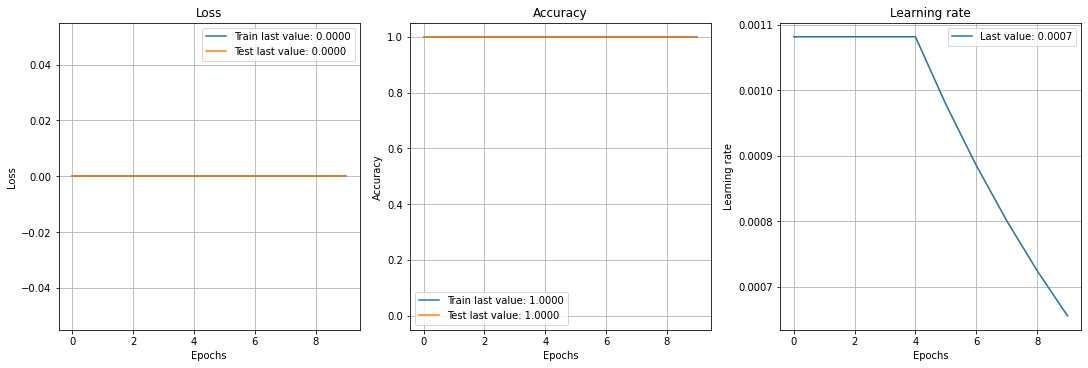

In [22]:
plot_history(history)
plt.show()

Saving 0 (1).jpg to 0 (1).jpg
0 (1).jpg
It's Dog


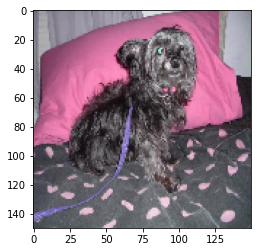

In [23]:
file_up = files.upload()
 
def predict_pic(files):
  for file in file_up.keys():
  # predicting images
    img = image.load_img(file, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=1000)
  print(file)
  if classes[0,0] == 1:
    print("It's Dog")
  else:
    print("It's Cat")
predict_pic(file_up)

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('RPS_model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmptj90hh87/assets
